In [1]:
from multidynet.datasets import load_icews
from splinetlsm import SplineDynamicLSM
from splinetlsm.mcmc import dynamic_adjacency_to_vec

In [2]:
Y, countries, layer_labels, time_labels = load_icews()
Y = Y[1]  # material conflict
time_points = np.arange(Y.shape[0])
time_points = time_points / time_points[-1]
y = dynamic_adjacency_to_vec(Y)

In [3]:
model = SplineDynamicLSM(n_features=2).sample(Y, time_points)

sample: 100%|███████████████████████| 2000/2000 [02:51<00:00, 11.69it/s, 127 steps of size 2.58e-02. acc. prob=0.89]


In [4]:
from sklearn.metrics import roc_auc_score

probas = model.predict_proba()

roc_auc_score(y.ravel(), probas.ravel())

0.8913547055917482

In [5]:
1/np.sqrt(model.samples_['lambda'].mean(axis=0))

array([0.62297487, 0.61853035])

In [6]:
ts = np.linspace(0, Y.shape[0]-1, num=50)/11

In [7]:
probas = model.predict_proba(time_points=ts)

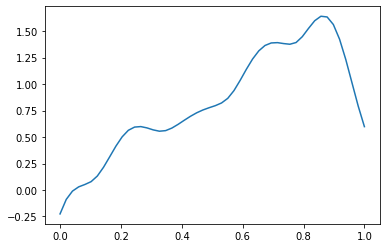

In [8]:
from scipy.special import logit


plt.plot(ts, logit(probas[:, 3]))

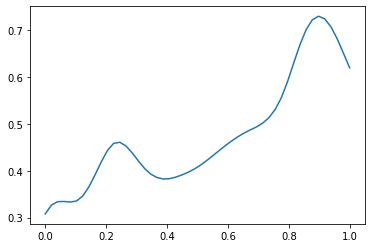

In [9]:
plt.plot(ts, probas[:, 1])

In [10]:
from dyneigenmodel.dynamic_gof import density, transitivity

res = model.posterior_predictive(density, time_points=ts)
se = np.quantile(res, q=[0.025, 0.975], axis=0)


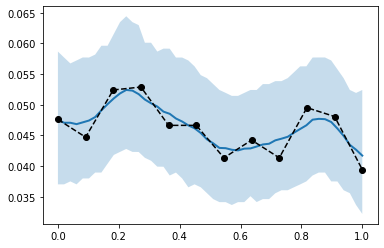

In [11]:
d_obs = y.mean(axis=1)
plt.plot(ts, res.mean(axis=0), lw=2)
plt.fill_between(ts, se[0], se[1], alpha=0.25)
plt.plot(time_points, d_obs, linestyle='--', marker='o', color='k')

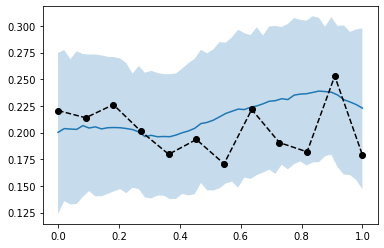

In [12]:
res = model.posterior_predictive(transitivity, time_points=ts)
se = np.quantile(res, q=[0.025, 0.975], axis=0)
d_obs = transitivity(y)
plt.plot(ts, res.mean(axis=0))
plt.fill_between(ts, se[0], se[1], alpha=0.25)
plt.plot(time_points, d_obs, linestyle='--', marker='o', color='k')

# Synthetic

In [2]:
from splinetlsm.datasets import synthetic_network_mixture

In [26]:
Y, time_points, _, probas, X = synthetic_network_mixture(
    n_nodes=25, n_time_points=20, length_scale=0.2, intercept=-4., 
    include_covariates=False)

In [9]:
from splinetlsm.mcmc import dynamic_adjacency_to_vec
y = dynamic_adjacency_to_vec(Y)
y.mean()

Array(0.16266666, dtype=float32)

In [10]:
model = SplineDynamicLSM(n_features=2).sample(Y, time_points)

sample: 100%|██████████████████████████████| 2000/2000 [01:12<00:00, 27.42it/s, 255 steps of size 2.39e-02. acc. prob=0.89]


In [23]:
from sklearn.metrics import roc_auc_score
from splinetlsm.mcmc import dynamic_adjacency_to_vec

y = dynamic_adjacency_to_vec(Y)
probas_pred = model.predict_proba()
roc_auc_score(y.ravel(), probas_pred.ravel())

0.9652271555549753

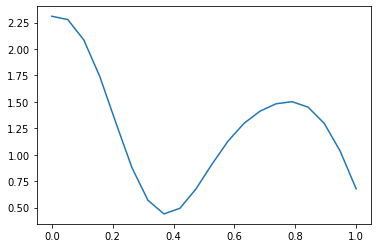

In [13]:
#plt.plot(time_points, Z[:, 0, 0])
plt.plot(time_points, X[:, 0, 0])

In [11]:
probas.shape

(25, 300)

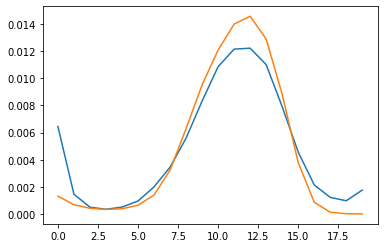

In [29]:
plt.plot(probas_pred[:, 30])
plt.plot(probas[:, 30])

In [17]:
ts = time_points

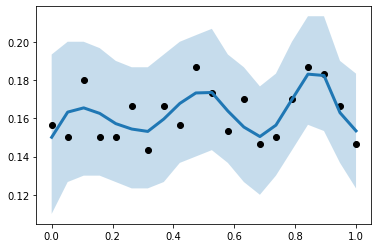

In [18]:
from dyneigenmodel.dynamic_gof import density, transitivity

res = model.posterior_predictive(density, time_points=ts)
se = np.quantile(res, q=[0.025, 0.975], axis=0)
y = dynamic_adjacency_to_vec(Y)
d_obs = y.mean(axis=1)
plt.plot(ts, res.mean(axis=0), lw=3)
plt.fill_between(ts, se[0], se[1], alpha=0.25)
plt.scatter(time_points, d_obs, color='k')

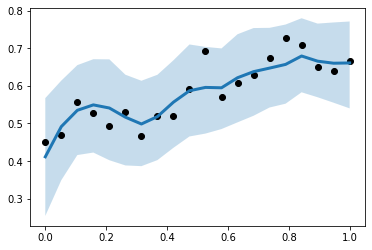

In [19]:
from dyneigenmodel.dynamic_gof import density, transitivity

res = model.posterior_predictive(transitivity, time_points=ts)
se = np.quantile(res, q=[0.025, 0.975], axis=0)
y = dynamic_adjacency_to_vec(Y)
d_obs = transitivity(y)
plt.plot(ts, res.mean(axis=0), lw=3)
plt.fill_between(ts, se[0], se[1], alpha=0.25)
plt.scatter(time_points, d_obs, marker='o', color='k')

In [20]:
model.samples_['intercept'].mean()

-3.9412534162175876

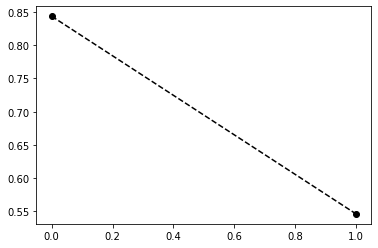

In [21]:
plt.plot(1/np.sqrt(model.samples_['lambda'].mean(axis=0)), 'ko--')

In [22]:
model.samples_['vh'].mean(axis=0)

array([2.43076475])

In [43]:
X.shape

(20, 25, 2)

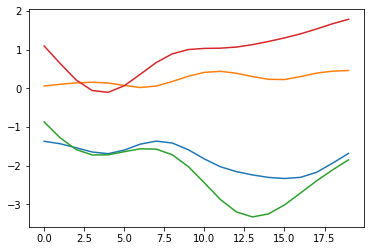

In [46]:
plt.plot(model.samples_['X'][-1, :, 23, :])
plt.plot(X[:, 23, :])

In [40]:
model.samples_['X'][-1, :, 0, :].shape

(20, 2)